In [1]:
#importing necessary libraries for data processing

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading Data files
data=pd.read_csv('C:/Users/Jathu/Desktop/Datastorm/credit_card_default_train.csv')
data_2=pd.read_csv('C:/Users/Jathu/Desktop/Datastorm/credit_card_default_test.csv')
data.isna().sum()
#There are no NaN values

Client_ID             0
Balance_Limit_V1      0
Gender                0
EDUCATION_STATUS      0
MARITAL_STATUS        0
AGE                   0
PAY_JULY              0
PAY_AUG               0
PAY_SEP               0
PAY_OCT               0
PAY_NOV               0
PAY_DEC               0
DUE_AMT_JULY          0
DUE_AMT_AUG           0
DUE_AMT_SEP           0
DUE_AMT_OCT           0
DUE_AMT_NOV           0
DUE_AMT_DEC           0
PAID_AMT_JULY         0
PAID_AMT_AUG          0
PAID_AMT_SEP          0
PAID_AMT_OCT          0
PAID_AMT_NOV          0
PAID_AMT_DEC          0
NEXT_MONTH_DEFAULT    0
dtype: int64

In [3]:
#for train data
ID=data.pop('Client_ID')   #not a feature
balance=data.pop('Balance_Limit_V1')

#for given test data
ID_2=data_2.pop('Client_ID')
balance_2=data_2.pop('Balance_Limit_V1')

In [4]:
#converting 100M,K values to integers
#for train data
for i in range (len(balance)):
    if balance[i][-1]=='M':
        balance[i]=float(balance[i][:-1])*1000000
    elif balance[i][-1]=='K':
        balance[i]=float(balance[i][:-1])*1000
    else:
         balance[i]=float(balance[i])*1
balance=pd.to_numeric(balance)
data=pd.concat([data,balance],axis=1)


#for test data
for i in range (len(balance_2)):
    if balance_2[i][-1]=='M':
        balance_2[i]=float(balance_2[i][:-1])*1000000
    elif balance_2[i][-1]=='K':
        balance_2[i]=float(balance_2[i][:-1])*1000
    else:
         balance_2[i]=float(balance_2[i])*1
balance_2=pd.to_numeric(balance_2)
data_2=pd.concat([data_2,balance_2],axis=1)
        
                    

In [5]:
#getting Dummies for gender,   M=1,F=0
#train data
gender_dummies=pd.get_dummies(data['Gender'],drop_first=True)
gender=data.pop('Gender')
data=pd.concat([data,gender_dummies],axis=1)

#test data
gender_dummies_2=pd.get_dummies(data_2['Gender'],drop_first=True)
gender_2=data_2.pop('Gender')
data_2=pd.concat([data_2,gender_dummies_2],axis=1)

In [6]:
#getting dummies for Educational Status ['GRADUATE','HIGH SCHOOL','OTHER_1']

#for train Data
edu_dummies=pd.get_dummies(data['EDUCATION_STATUS'])
edu_dummies.columns = ['GRADUATE','HIGH SCHOOL','OTHER_1']
eduation=data.pop('EDUCATION_STATUS')
data=pd.concat([data,edu_dummies],axis=1)

#for Test Data
edu_dummies_2=pd.get_dummies(data_2['EDUCATION_STATUS'])
edu_dummies_2.columns = ['GRADUATE','HIGH SCHOOL','OTHER_1']
eduation_2=data_2.pop('EDUCATION_STATUS')
data_2=pd.concat([data_2,edu_dummies_2],axis=1)

In [7]:
#getting dummies for MARITAL_STATUS

#for train Data
marital_dummies=pd.get_dummies(data['MARITAL_STATUS'])
marital_status=data.pop('MARITAL_STATUS')
data=pd.concat([data,marital_dummies],axis=1)

#for test Data
marital_dummies_2=pd.get_dummies(data_2['MARITAL_STATUS'])
marital_status_2=data_2.pop('MARITAL_STATUS')
data_2=pd.concat([data_2,marital_dummies_2],axis=1)

In [8]:
#getting dummies for AGE

#for train Data
age_dummies=pd.get_dummies(data['AGE'],drop_first=True)
age=data.pop('AGE')
data=pd.concat([data,age_dummies],axis=1)

#for test Data
age_dummies_2=pd.get_dummies(data_2['AGE'],drop_first=True)
age_2=data_2.pop('AGE')
data_2=pd.concat([data_2,age_dummies_2],axis=1)

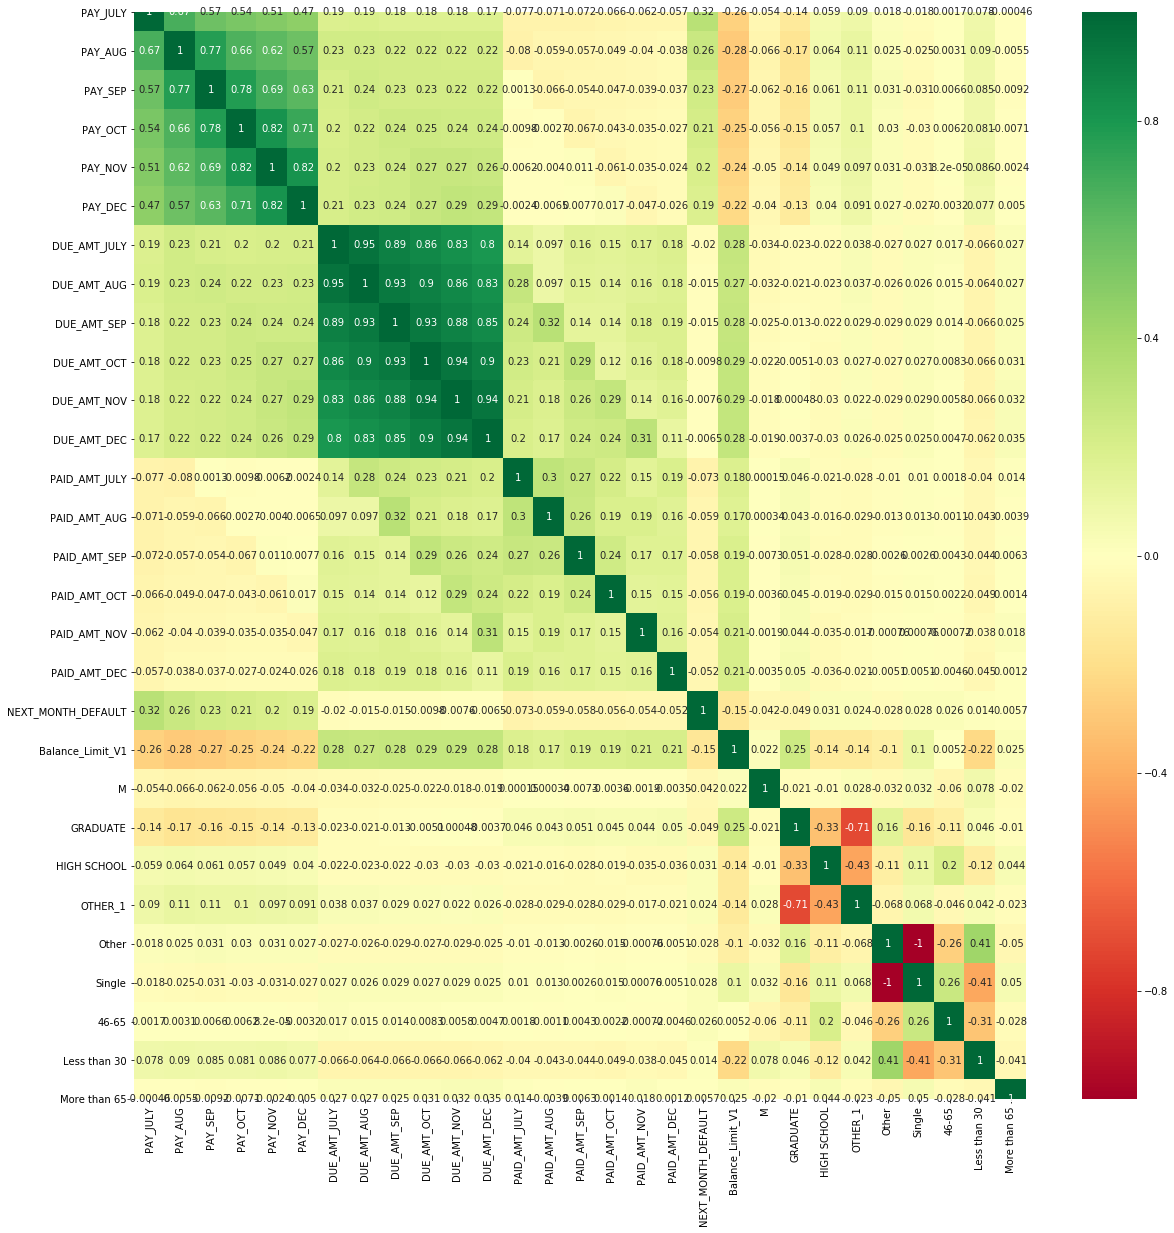

In [9]:
#Heatmap
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

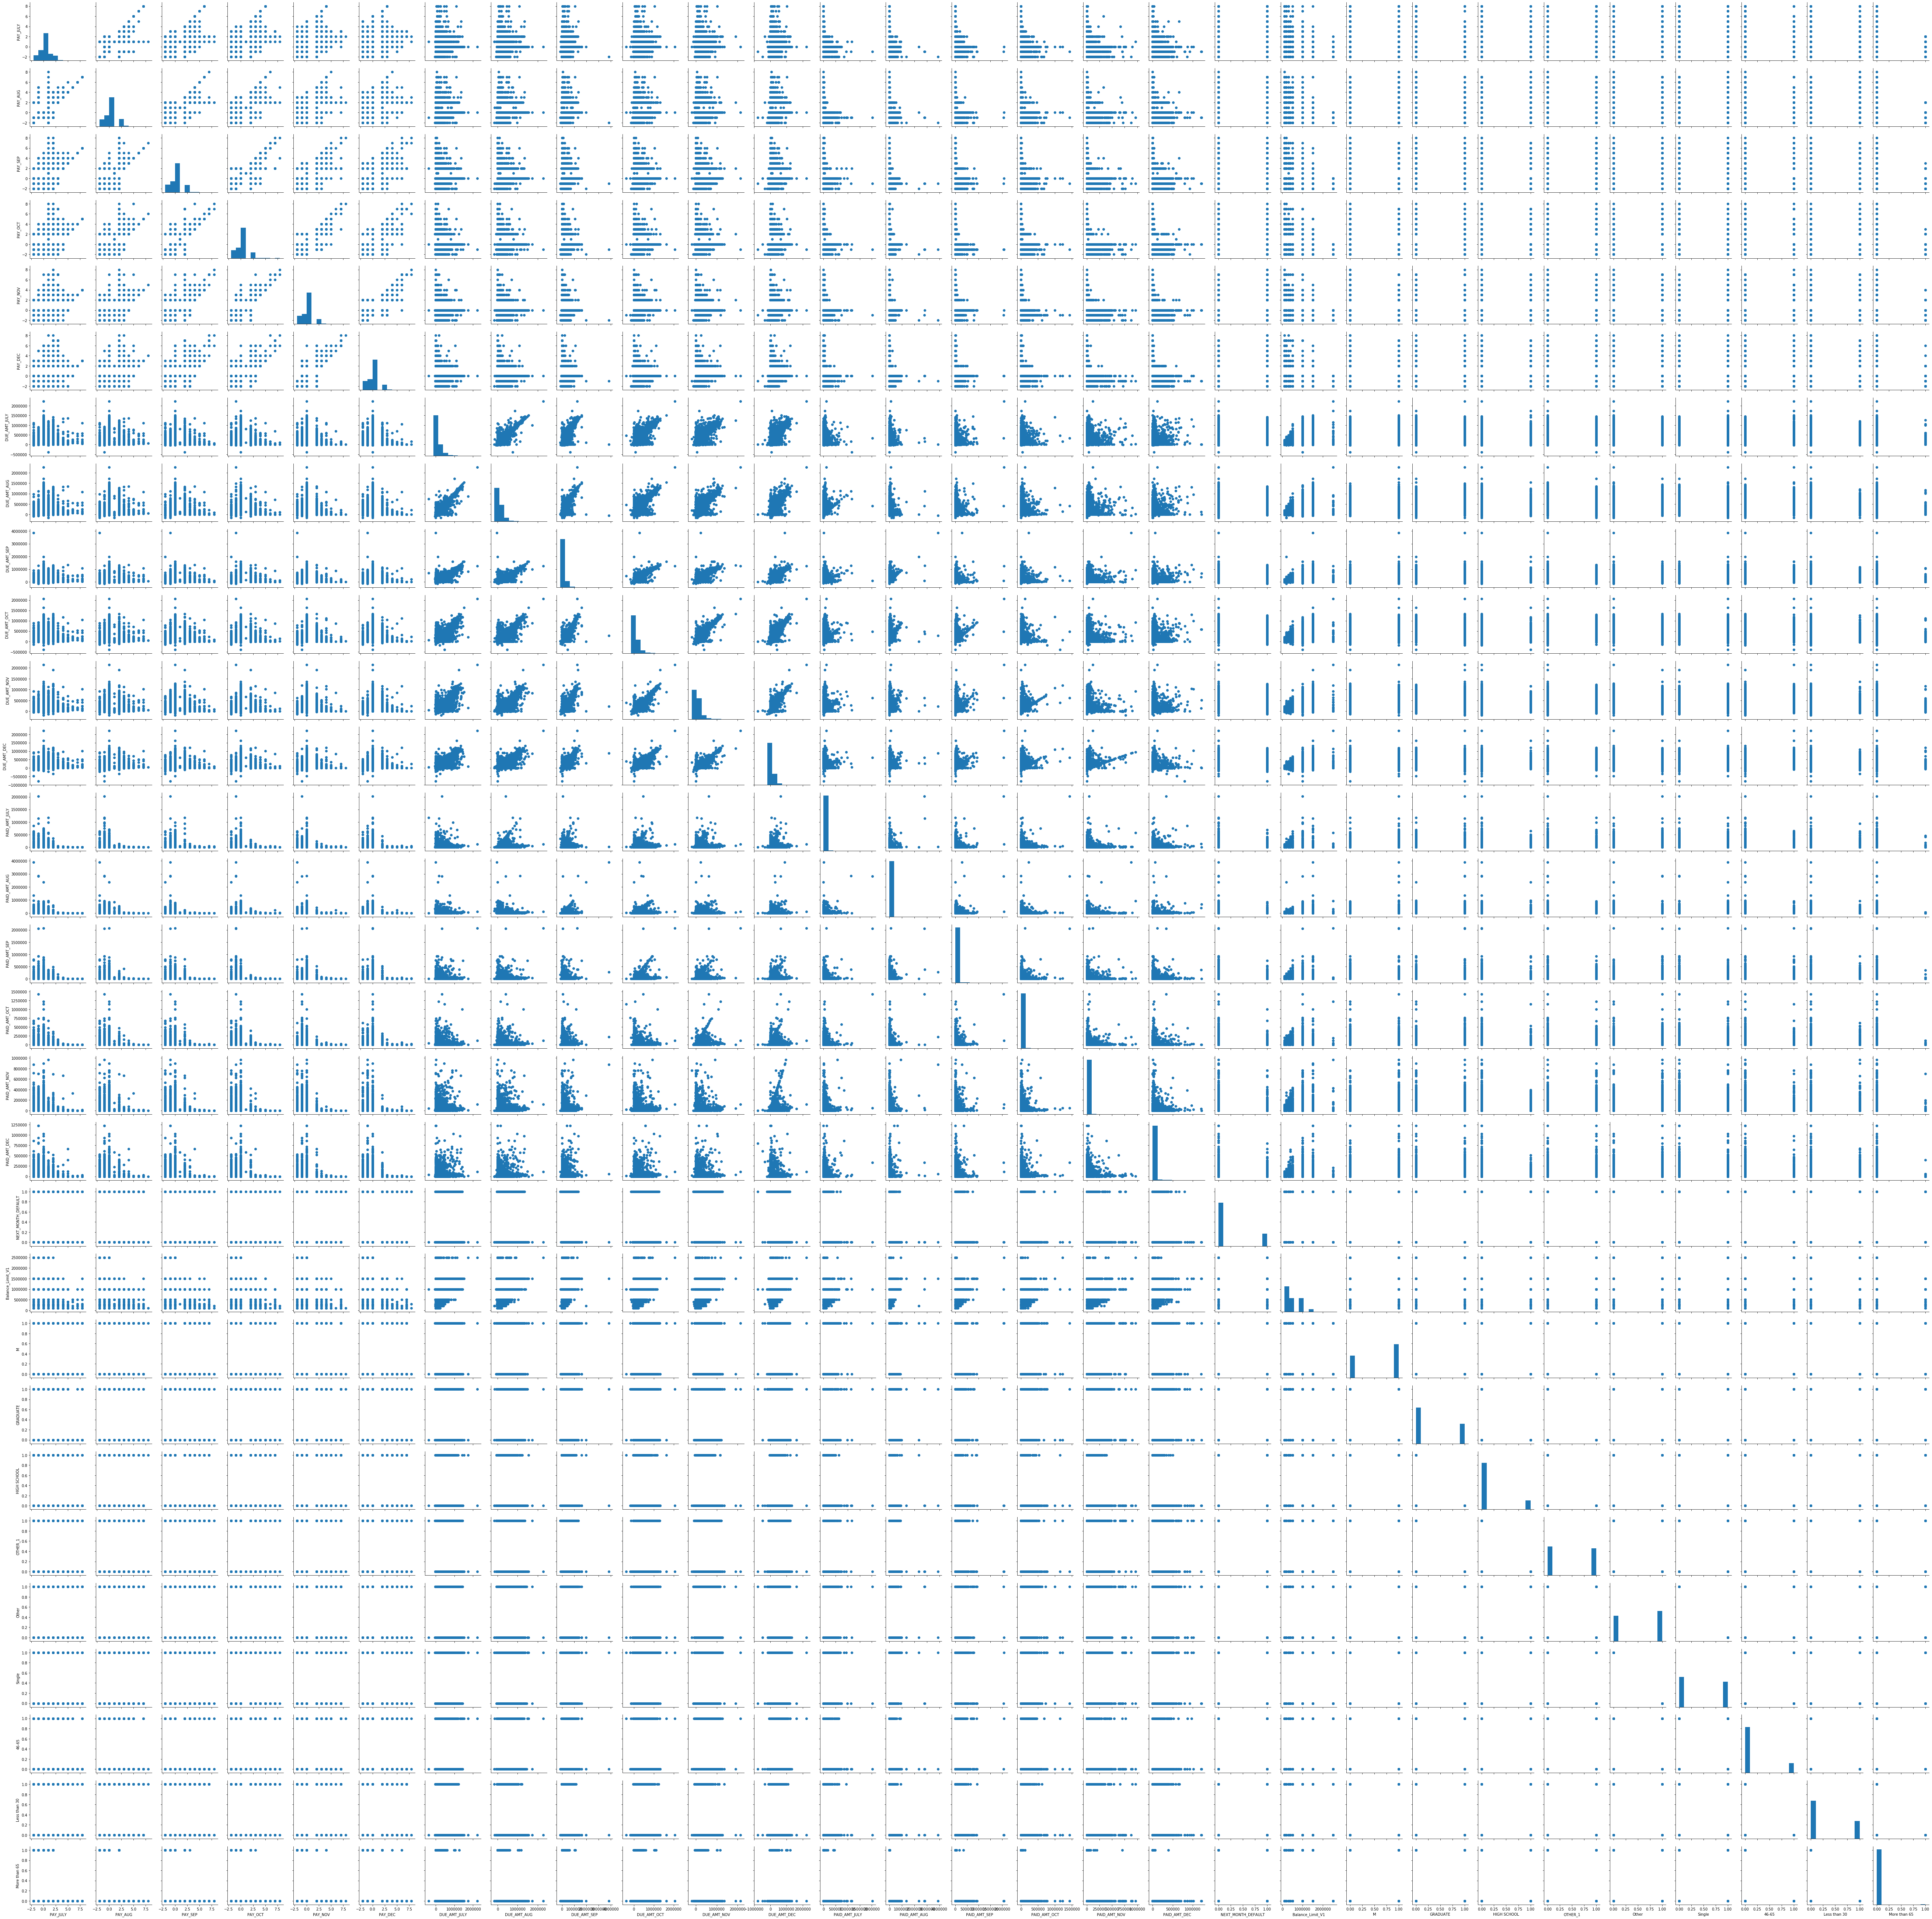

In [10]:
#for analysing the Features
g=sns.PairGrid(data)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [11]:
#separating Labels data field
Labels=data.pop('NEXT_MONTH_DEFAULT')

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(data)
data_2 = sc.transform(data_2)

In [13]:
data=pd.DataFrame(data)
data_2=pd.DataFrame(data_2)

In [14]:
#Machine Learning Model training part

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
from sklearn.metrics import precision_score,roc_auc_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier


In [15]:
#Spliting the given train data set into train_data and Validation data
train_data, test_data, train_label, test_label = train_test_split(data,Labels,test_size = 0.2,random_state = 100)

### ML models tried and hypertuned

Train accuracy
0.8270833333333333
Test accuracy
0.819375
F1-Score
0.4618249534450652
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3773
           1       0.64      0.36      0.46      1027

    accuracy                           0.82      4800
   macro avg       0.74      0.65      0.68      4800
weighted avg       0.80      0.82      0.80      4800

Confusion Matrix
[[3561  212]
 [ 655  372]]
Feature Importance
[0.63339864 0.13497783 0.00837312 0.00378905 0.02131116 0.02458748
 0.02935898 0.00666697 0.00248298 0.0018074  0.0044812  0.00898599
 0.00255843 0.01263473 0.056604   0.00451667 0.00579176 0.00370603
 0.0248133  0.00334936 0.         0.         0.         0.00092683
 0.         0.         0.00258484 0.00229325]


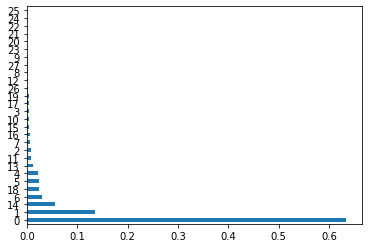

In [16]:
#Decision Tree Classifier model approach
clf = DecisionTreeClassifier(max_depth=6).fit(train_data,train_label)
y_predict=clf.predict(test_data)
print("Train accuracy")
print(format(clf.score(train_data,train_label)))
print("Test accuracy")
print(format(clf.score(test_data,test_label)))
print("F1-Score")
print(f1_score(test_label,y_predict))
print("Classification Report")
print(classification_report(test_label,y_predict))
print("Confusion Matrix")
print(confusion_matrix(test_label,y_predict))


#Feature Importance in Decision Tree Classifier
print("Feature Importance")
print(clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf.feature_importances_, index=train_data.columns)
feat_importances.nlargest(40).plot(kind='barh')
plt.show()



In [17]:
#Support Vector Machine Approach
clf = svm.SVC(degree=9,decision_function_shape='ovr')
clf.fit(train_data,train_label)       #loop le ovvoru classifier kum prediction and confusion matrix parkuren
y_predict=clf.predict(test_data)
print("Train accuracy")
print(format(clf.score(train_data,train_label)))
print("Test accuracy")
print(format(clf.score(test_data,test_label)))
print("F1-Score")
print(f1_score(test_label,y_predict))
print("Classification Report")
print(classification_report(test_label,y_predict))
print("Confusion Matrix")
print(confusion_matrix(test_label,y_predict))

C:\Users\Jathu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train accuracy
0.8253645833333333
Test accuracy
0.8164583333333333
F1-Score
0.436340371081254
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3773
           1       0.64      0.33      0.44      1027

    accuracy                           0.82      4800
   macro avg       0.74      0.64      0.66      4800
weighted avg       0.80      0.82      0.79      4800

Confusion Matrix
[[3578  195]
 [ 686  341]]


In [18]:
#logistic regression approach
model= LogisticRegression(solver='saga',max_iter=100) 
model.fit(train_data,train_label) 
y_predict=model.predict(test_data)
print("Train accuracy")
print(format(model.score(train_data,train_label)))
print("Test accuracy")
print(format(model.score(test_data,test_label)))
print("F1-Score")
print(f1_score(test_label,y_predict))
print("Classification Report")
print(classification_report(test_label,y_predict))
print("Confusion Matrix")
print(confusion_matrix(test_label,y_predict))

Train accuracy
0.8105729166666666
Test accuracy
0.81375
F1-Score
0.3559077809798271
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      3773
           1       0.68      0.24      0.36      1027

    accuracy                           0.81      4800
   macro avg       0.75      0.61      0.62      4800
weighted avg       0.79      0.81      0.78      4800

Confusion Matrix
[[3659  114]
 [ 780  247]]


C:\Users\Jathu\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [19]:
#MLP classifier approach
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='sgd',learning_rate = 'adaptive',learning_rate_init=0.01,activation= 'logistic', alpha=1e-6, hidden_layer_sizes=(150, ), random_state=91,max_iter=400)
clf_mlp.fit(train_data,train_label) 
y_predict=clf_mlp.predict(test_data)
print("Train accuracy")
print(format(clf_mlp.score(train_data,train_label)))
print("Test accuracy")
print(format(clf_mlp.score(test_data,test_label)))
print("F1-Score")
print(f1_score(test_label,y_predict))
print("Classification Report")
print(classification_report(test_label,y_predict))
print("Confusion Matrix")
print(confusion_matrix(test_label,y_predict))

Train accuracy
0.8208333333333333
Test accuracy
0.8158333333333333
F1-Score
0.44542032622333755
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3773
           1       0.63      0.35      0.45      1027

    accuracy                           0.82      4800
   macro avg       0.73      0.64      0.67      4800
weighted avg       0.80      0.82      0.79      4800

Confusion Matrix
[[3561  212]
 [ 672  355]]


In [20]:
#Random Forest approach
model_RFC = RandomForestClassifier(max_depth=7,max_features=10,n_estimators=75)
model_RFC.fit(train_data,train_label)       
y_predict=model_RFC.predict(test_data)
print("Train accuracy")
print(format(model_RFC.score(train_data,train_label)))
print("Test accuracy")
print(format(model_RFC.score(test_data,test_label)))
print("F1-Score")
print(f1_score(test_label,y_predict))
print("Classification Report")
print(classification_report(test_label,y_predict))
print("Confusion Matrix")
print(confusion_matrix(test_label,y_predict))

Train accuracy
0.833125
Test accuracy
0.82125
F1-Score
0.4670807453416149
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      3773
           1       0.64      0.37      0.47      1027

    accuracy                           0.82      4800
   macro avg       0.75      0.66      0.68      4800
weighted avg       0.80      0.82      0.80      4800

Confusion Matrix
[[3566  207]
 [ 651  376]]


In [21]:
#KNN approach
model_KNN=KNeighborsClassifier(n_neighbors=3,algorithm='ball_tree',weights='distance')
model_KNN.fit(train_data,train_label)       
y_predict=model_KNN.predict(test_data)
print("Train accuracy")
print(format(model_KNN.score(train_data,train_label)))
print("Test accuracy")
print(format(model_KNN.score(test_data,test_label)))
print("F1-Score")
print(f1_score(test_label,y_predict))
print("Classification Report")
print(classification_report(test_label,y_predict))
print("Confusion Matrix")
print(confusion_matrix(test_label,y_predict))

Train accuracy
0.9940625
Test accuracy
0.7660416666666666
F1-Score
0.39591178052716514
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      3773
           1       0.44      0.36      0.40      1027

    accuracy                           0.77      4800
   macro avg       0.64      0.62      0.63      4800
weighted avg       0.75      0.77      0.76      4800

Confusion Matrix
[[3309  464]
 [ 659  368]]


In [22]:
#Ensemble - extra tree classifier approach
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(max_depth=6,n_estimators=100)
model.fit(train_data, train_label)
y_pred= model.predict(test_data)
print("Train accuracy")
print(format(model.score(train_data,train_label)))
print("Test accuracy")
print(format(model.score(test_data,test_label)))
print("F1-Score")
print(f1_score(test_label,y_predict))
print("Classification Report")
print(classification_report(test_label,y_predict))
print("Confusion Matrix")
print(confusion_matrix(test_label,y_predict))

Train accuracy
0.7991666666666667
Test accuracy
0.8022916666666666
F1-Score
0.39591178052716514
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      3773
           1       0.44      0.36      0.40      1027

    accuracy                           0.77      4800
   macro avg       0.64      0.62      0.63      4800
weighted avg       0.75      0.77      0.76      4800

Confusion Matrix
[[3309  464]
 [ 659  368]]


### BEST MODEL CHOSEN

In [23]:
#XGB classifier approach
clf = DecisionTreeClassifier(max_depth=50)
model=xgboost.XGBClassifier(base_estimator=clf,max_depth=5,n_estimators=15,objective='binary:logistic',gamma=4.63,learning_rate=0.2,reg_lambda=1).fit(train_data,train_label)
y_predict=model.predict(test_data)
print(format(model.score(train_data,train_label)))
print(format(model.score(test_data,test_label)))
print(f1_score(test_label,y_predict))
print(roc_auc_score(test_label,y_predict))
print (classification_report(test_label, y_predict))
print(confusion_matrix(test_label,y_predict))

0.8276041666666667
0.8235416666666666
0.4729309271935283
0.6585007604124111
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      3773
           1       0.66      0.37      0.47      1027

    accuracy                           0.82      4800
   macro avg       0.75      0.66      0.68      4800
weighted avg       0.81      0.82      0.80      4800

[[3573  200]
 [ 647  380]]


In [24]:
#Creating Submission file
submit=pd.read_csv('C:/Users/Jathu/Desktop/Datastorm/submit.csv')
submit.pop('NEXT_MONTH_DEFAULT')
predic=model.predict(data_2)
print(predic[0:100])
result=pd.DataFrame(predic,columns=['NEXT_MONTH_DEFAULT'])
submit=pd.concat([submit,result],axis=1)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
export_csv=export_csv=submit.to_csv('C:/Users/Jathu/Desktop/Datastorm/submit.csv')